
--- XGBoost Model ---
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best score for XGBoost: 0.8815859213879979
XGBoost Confusion Matrix:
 [[1149  200]
 [ 102 1243]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88      1349
           1       0.86      0.92      0.89      1345

    accuracy                           0.89      2694
   macro avg       0.89      0.89      0.89      2694
weighted avg       0.89      0.89      0.89      2694

XGBoost AUC Score: 0.9461129130486303


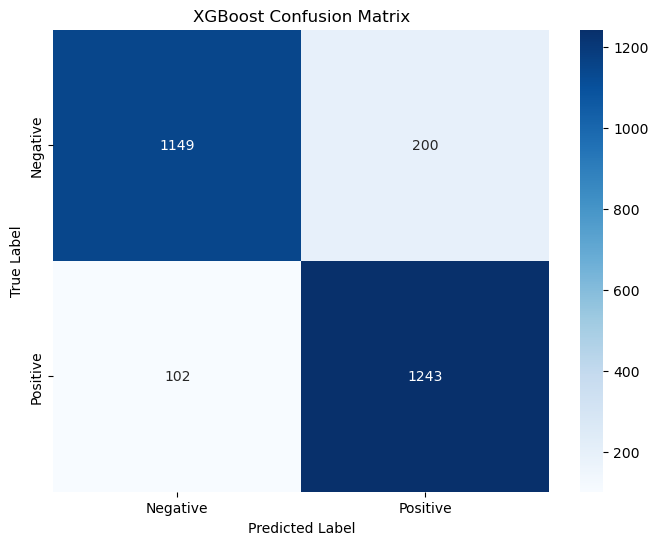

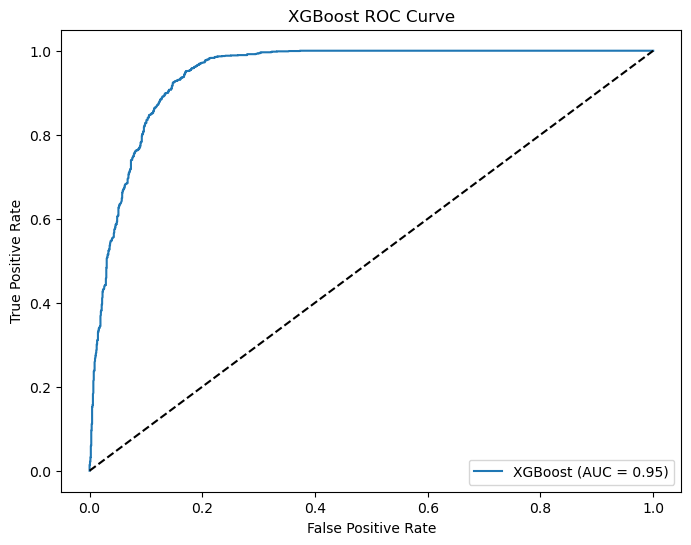

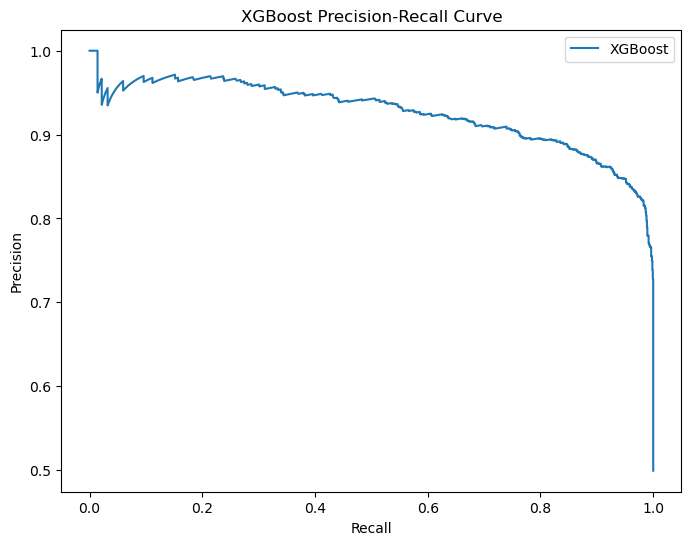


--- Random Forest Model ---
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
Best score for Random Forest: 0.8801554606306594
Random Forest Confusion Matrix:
 [[1135  214]
 [  99 1246]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      1349
           1       0.85      0.93      0.89      1345

    accuracy                           0.88      2694
   macro avg       0.89      0.88      0.88      2694
weighted avg       0.89      0.88      0.88      2694

Random Forest AUC Score: 0.9427820690529402


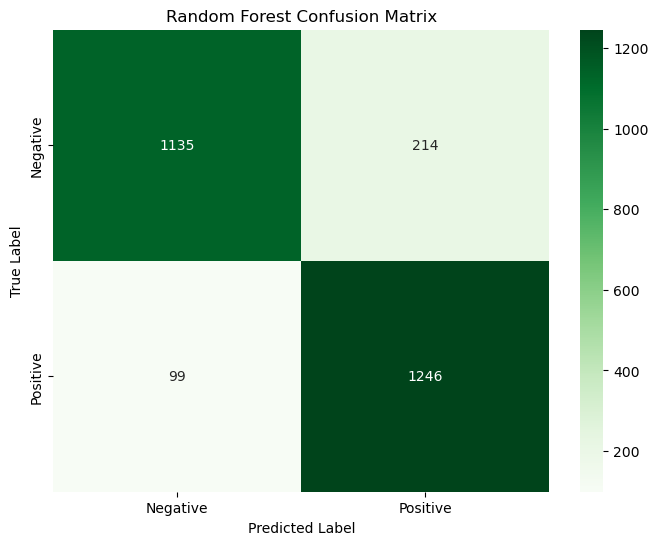

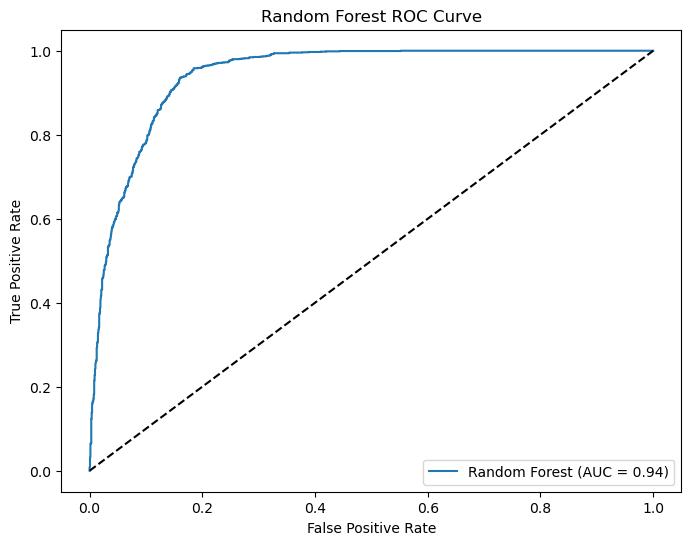

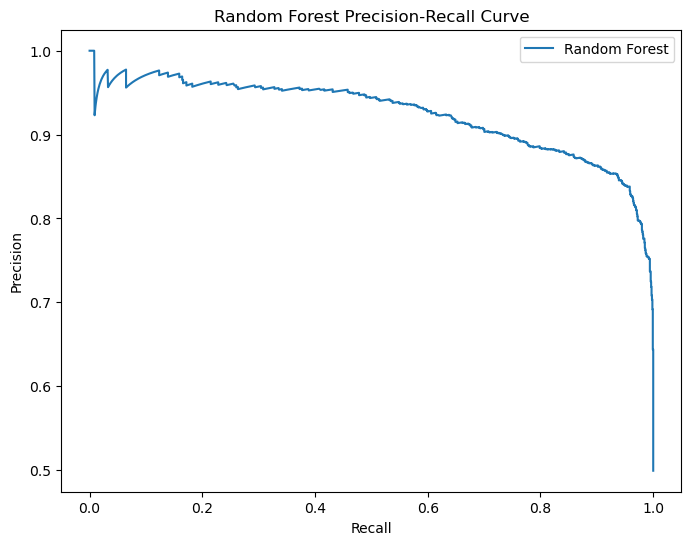

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pre-processed data and target variable
scaled_data = pd.read_csv("Normalized_data.csv")
target = pd.read_csv("Target.csv").squeeze()

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, target, test_size=0.3, random_state=0)

# --- XGBoost Model ---
print("\n--- XGBoost Model ---")
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
xgb_model = xgb.XGBClassifier(random_state=0)
grid_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1)
grid_xgb.fit(X_train, Y_train)
print('Best parameters for XGBoost: {}'.format(grid_xgb.best_params_))
print('Best score for XGBoost: {}'.format(grid_xgb.best_score_))
best_xgb_model = xgb.XGBClassifier(random_state=0, **grid_xgb.best_params_)
best_xgb_model.fit(X_train, Y_train)

predicted_xgb = best_xgb_model.predict(X_test)
predicted_xgb_prob = best_xgb_model.predict_proba(X_test)[:, 1]
confusion_xgb = confusion_matrix(Y_test, predicted_xgb)
print("XGBoost Confusion Matrix:\n", confusion_xgb)
classification_report_xgb = classification_report(Y_test, predicted_xgb)
print("XGBoost Classification Report:\n", classification_report_xgb)
xgb_auc_score = roc_auc_score(Y_test, predicted_xgb_prob)
print("XGBoost AUC Score:", xgb_auc_score)

# Visualize XGBoost Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize XGBoost ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(Y_test, predicted_xgb_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()

# Visualize XGBoost Precision-Recall Curve
precision_xgb, recall_xgb, thresholds_pr_xgb = precision_recall_curve(Y_test, predicted_xgb_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.legend()
plt.show()

# --- Random Forest Model ---
print("\n--- Random Forest Model ---")
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_leaf': [1, 3]
}
rf_model = RandomForestClassifier(random_state=0)
grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train, Y_train)
print('Best parameters for Random Forest: {}'.format(grid_rf.best_params_))
print('Best score for Random Forest: {}'.format(grid_rf.best_score_))
best_rf_model = RandomForestClassifier(random_state=0, **grid_rf.best_params_)
best_rf_model.fit(X_train, Y_train)

predicted_rf = best_rf_model.predict(X_test)
predicted_rf_prob = best_rf_model.predict_proba(X_test)[:, 1]
confusion_rf = confusion_matrix(Y_test, predicted_rf)
print("Random Forest Confusion Matrix:\n", confusion_rf)
classification_report_rf = classification_report(Y_test, predicted_rf)
print("Random Forest Classification Report:\n", classification_report_rf)
rf_auc_score = roc_auc_score(Y_test, predicted_rf_prob)
print("Random Forest AUC Score:", rf_auc_score)

# Visualize Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize Random Forest ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, predicted_rf_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

# Visualize Random Forest Precision-Recall Curve
precision_rf, recall_rf, thresholds_pr_rf = precision_recall_curve(Y_test, predicted_rf_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.legend()
plt.show()